In [1]:
import simpy
import pandas as pd
import numpy as np
import matplotlib as mpl
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt

VARIABLE DECLARATION

In [ ]:
#values obtained from the project description

block_count = 10                                  # Number of blocks considered  between London Old Oak Common Station and Birmingham Interchange Station
block_len = 145000/block_count    # block length in meters
n_free_blck = 1                                     # Number of free blocks required to keep the train move faster
A =  0.76                                                  # Acceleration 0.76 m/s2
maxV = 86.1                                            # Max velocity of a train 86.1m/s
Op_break = 0.38                                  #deceleration on optimum brake
Em_brake = 2.5                                      #deceleration on Emergency brake
#ta = 113.3                                               #time taken to accelerate to max velocity
#da = 4878                                              # distance travelled with acceleration to attain the max velocity

In [122]:
#Helper function for calculating the time and distance for acceleration and deceleration
def timeTo(a, maxV, d):

    ta = maxV/a         # time to accelerate to maxV
    da = a*ta**2        # distance traveled during acceleration from 0 to maxV and back to 0
    if (d < da):        # train never reaches full speed?
        return np.sqrt(4.0*d/a)     # time needed to accelerate to half-way point then decelerate to destination
    else:
        return 2*ta + (d-da)/maxV   # time to accelerate to maxV plus travel at maxV plus decelerate to destination

In [123]:
#function for plotting and calculating the Probability distribution function

def plot(data, xmin, xmax, pdf=None, bins=None, μ=None, σ=None, title=None, xlabel=None, ylabel=None):
#initializing the values of plot
    
    #setting the current axis to the plot
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(5)
    ax = fig.gca()
    
    #setting the values
    μ = np.mean(data)
    σ = np.std(data)  
    minx = min(data)
    maxx = max(data)
    
    #providing the limits to the axis of the plot
    ax.set_xlim(xmin, xmax)
    
    #title of the plot
    if title!=None:
        plt.title(title)
    
    #histogram plot
    plt.hist(data, bins=bins, density=True)
    
    # calculate parameter for text positioning
    dx=(xmax-xmin)*0.02
    ymin, ymax=plt.ylim()
    ypos=ymin+0.9*(ymax-ymin)
     
    # plot the probability density function if one is given
    if pdf!=None:
        
        #marking the limits of the plot
        X = list(np.linspace(xmin, xmax, 100))
        
        #marking the x inside the X limit
        Y = [ pdf(x) for x in X]
        plt.plot(X, Y, lw=2, color='red')
 
    ax.axvline(x=μ, color='red', linestyle='dashed', lw=2)
    plt.text(μ+dx, ypos, f"μ={μ:3.2f}", color='red', fontsize=14)
    
    ax.axvline(x=minx, color='red', linestyle=':')
    ax.axvline(x=maxx, color='red', linestyle=':')

        
    plt.grid(True)

In [124]:
#Creating a dataframe for Simulation with the normal distribution to replicate the real-time varition of drive time of the train.

df = pd.DataFrame(columns=['Line','Block','From','To','Distance','Drive Time'])
mu, sigma = 3.378, 0.751 # mean and standard deviation
for i in range(block_count):
    operational_delay = np.random.lognormal(mu, sigma, 1) # Log normal transformation
    df.loc[i] = list(['HS2']) + ['Block' + str(i+1)] + ['Block' + str(i)] + ['Block' + str(i+1)] + list([block_len] + list(np.round(timeTo(A,maxV,block_len)+operational_delay,2)))

df.loc[0] = list(['HS2']) + ['Block' + str(1)] + [' London Old Oak'] + ['Block'+str(1)] + list([block_len] + list(np.round(timeTo(A,maxV,block_len)+operational_delay,2)))
        

In [82]:
df

,Line,Block,From,To,Distance,Drive Time
0,HS2,Block1,London Old Oak,Block1,14500.0,375.44
1,HS2,Block2,Block1,Block2,14500.0,310.65
2,HS2,Block3,Block2,Block3,14500.0,309.08
3,HS2,Block4,Block3,Block4,14500.0,291.24
4,HS2,Block5,Block4,Block5,14500.0,292.66
5,HS2,Block6,Block5,Block6,14500.0,340.55
6,HS2,Block7,Block6,Block7,14500.0,298.78
7,HS2,Block8,Block7,Block8,14500.0,298.10
8,HS2,Block9,Block8,Block9,14500.0,288.19
9,HS2,Block10,Block9,Block10,14500.0,375.44


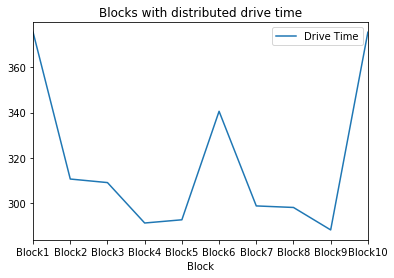

In [83]:
df.plot.line(x='Block', y='Drive Time', title = 'Blocks with distributed drive time')

1.7σ


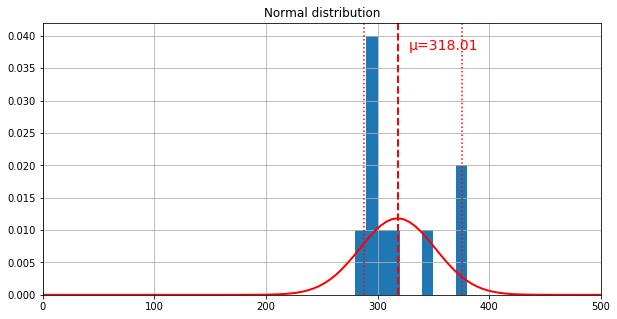

In [84]:
#Plotting the distribution of the Drivetime and plotting the mean and standard deviation values.
df['Drive Time'].describe()
iarr = df['Drive Time']
σ = iarr.std()                                   #standard deviation of the Drivetime
μ = iarr.mean()                               #Mean of the Drivetime
norm = stats.norm(loc=μ, scale=σ).pdf
plot(iarr, pdf=norm, xmin=0, xmax=500, bins=np.linspace(0, 400, 41), title = 'Normal distribution')
print(f"{max((μ-iarr.min())/σ,  (iarr.max()-μ)/σ):3.1f}σ")

In [125]:
df['max a']=0.7
df['max v']=25

In [126]:
df

,Line,Block,From,To,Distance,Drive Time,max a,max v
0,HS2,Block1,London Old Oak,Block1,11153.846154,249.39,0.7,25
1,HS2,Block2,Block1,Block2,11153.846154,271.79,0.7,25
2,HS2,Block3,Block2,Block3,11153.846154,270.21,0.7,25
3,HS2,Block4,Block3,Block4,11153.846154,252.38,0.7,25
4,HS2,Block5,Block4,Block5,11153.846154,253.80,0.7,25
5,HS2,Block6,Block5,Block6,11153.846154,301.69,0.7,25
6,HS2,Block7,Block6,Block7,11153.846154,259.91,0.7,25
7,HS2,Block8,Block7,Block8,11153.846154,259.23,0.7,25
8,HS2,Block9,Block8,Block9,11153.846154,249.32,0.7,25
9,HS2,Block10,Block9,Block10,11153.846154,336.58,0.7,25


In [127]:
#Helper class to get the current time

def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

SIMULATION

CREATING THE INFRASTRUCTURE FOR THE SIMULATION

In [128]:
#BASE CLASS

class NetworkNode:
    
    def __init__(self, location, line):
        self.location=location
        self.line=line
        self.tracing=False
        self.incidents=[]

    # is only used in connection with tracing
    def setTrack(self, track):
        self.track=track
        
    def isTracing(self):
        return self.tracing and self.track.isTracing()
    
    def trace(self):
        self.tracing=True
        
    def trace_prefix(self, train):
        global max_line_name_length
        
        return f"{now():s} " \
               f"{self.line:{max_line_name_length}s} " \
               f"[Train {train.getNo():2d} ]"
            
    
    def arr(self, train):
        if self.isTracing() and train.isTracing():
            print(f"{self.trace_prefix(train):s} arr {self.loc():s}")  
            print(f"{now():s} {self.loc():s} Signal Turns Red ")

    def dep(self, train, dest):
        if self.isTracing() and train.isTracing():
            print(f"{self.trace_prefix(train):s} dep {self.loc():s} for {dest.loc():s}")
        
    def loc(self):
        return self.location
    
    def __str__(self):
        return self.location
    

    def getResource(self):
        pass
    
    #Incident Handling
    # trace output for incident
    def inc(self, train):
        if self.isTracing() or train.isTracing():
            delay=self.incidentDelay()
            message=f"######Temporary Delay due to Electrical Malfunction### Expected delay for: {daytime(delay):s}"if delay>0 else "####Delay Cleared after the Repairing the Malfunction########"
            print(f"{self.trace_prefix(train):s} inc {self.loc():s} {message:s}")        
            
    # registers an incident
    def registerIncident(self, incident):
        self.incidents+=[incident]
        
    # checks if there is currently an incident in progress
    # if yes, it returns True otherwise False
    def isIncident(self):
        for inc in self.incidents:
            if inc.active():
                return True
        return False
        
    # if there is currently an incident in progress it returns
    # the time the incident will probably continue, otherwise it returns 0
    def incidentDelay(self):
        stopTime=0
        for incident in self.incidents:
            if incident.active():
                stopTime=max(stopTime, incident.stopTime())
        return 0 if stopTime==0 else stopTime-env.now

Depot

In [129]:
class Depot(NetworkNode):
    def __init__(self, location, line):
        super().__init__(location+" (DEPOT)", line)
        
        
    def driveTime(self):
        return 20
       
    def dep(self, train, dest):
       
        super().dep(train, dest)
        
    def getResource(self):
        return None

Station

In [130]:
class Station(NetworkNode):
    def __init__(self, location, line):
        super().__init__(location, line)
        self.location=location
        self.line=line
        self.resource=simpy.Resource(env, capacity=1)
        
        dd=df[df['Line']==self.line]
        dd=dd[dd['From']==location]
        
        if len(dd)==0:
           
            self.drive_time=20
            self.off_peak_dwell_time=60
            self.peak_dwell_time=60
        else:
            self.drive_time=dd.iloc[0].at['Drive Time']
            
    def driveTime(self):
        return self.drive_time
    
    def __str__(self):
        return self.location + " (" + self.location + ")"

    def getResource(self):
        return self.resource

Track

In [131]:
class Track(object):
    total_trains = 0
    def __init__(self, network, line, depot, stations):
        self.network=network
        self.line=line
        
        # extract line specific parameters
        self.start = df.at[line, 'start'][0]
        self.stop  = df.at[line, 'stop'][0]
        self.freq  = df.at[line, 'freq'][0]
                
        self.track=[depot]+stations+[depot]
        for s in self.track:
            s.setTrack(self)
            
        self.tracing=False
        self.tracingTrains=False
        self.tracingTrainNos=[]
    
    def checkDelay(self):
        tmp_stat = self.getStations()
        for i in tmp_stat:
            if i.isIncident():
                return i.incidentDelay()
        
        return None
    
    def isTracing(self):
        return self.tracing and self.network.isTracing()

    def isTracingTrains(self):
        return self.tracingTrains and self.network.isTracing()
    
    def trace(self, loc=None, train=None):
        self.tracing=True
        if loc is None:
            for s in self.track:
                s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)
        else:
            for s in self.track:
                if s.loc()==loc:
                    s.trace()
            if train is not None:
                self.tracingTrains=True
                self.tracingTrainNos.append(train)

    def getNetwork(self):
        return self.network
    
    def getLine(self):
        return self.line
    
    def getName(self):
        if self.direction is None:
            return self.line
        else:
            return self.line + " ("+self.direction+")"
    
    def getStations(self):
        return self.track
    
    def process(self):
        yield env.timeout(self.start-env.now) # the line starts operating at 7am
        inc_updated = False
        for i in range(int((self.stop-self.start)/self.freq)):
            t=Train(i, self)
            if self.tracingTrains and i in self.tracingTrainNos:
                t.trace()
            env.process(t.process())
            self.total_trains=i
            if self.checkDelay() is not None and inc_updated == False:
                yield env.timeout(self.checkDelay()+5)
                inc_updated = True
            else:
                yield env.timeout(self.freq)     
            
    def __str__(self):
        direction = "" if self.direction is None else " ("+self.direction+")"
        stations = " - ".join([ str(s) for s in self.track ])
        return self.line + ": " + stations

In [132]:
def allStations(line):
    dl=df[df['Line']==line]
    stations=dl['From'].to_list()
    stations+=[dl['To'].to_list()[-1]]
    return [ Station(s, line) for s in stations ]

In [133]:
def allTracks(network):
    lines=[]
    for line in df['Line'].unique():
        stations=[ allStations(line)]
        depot = Depot(stations[0][0].loc(), line)
        l = Track(network, line, depot, stations[0])
        lines += [l]
    return lines

Network

In [94]:
class Network(object):
    def __init__(self):
        self.tracks=allTracks(self)
        
        self.tracing=False
        self.tracingStart=None
        self.tracingStop=None
        
    def getTracks(self):
        return self.tracks
    
    def isTracing(self):
        return self.tracing and \
                (self.tracingStart is None or self.tracingStart<=env.now) and \
                (self.tracingStop is None or env.now <= self.tracingStop)
    
    def trace(self, line=None, loc=None, train=None, start=None, stop=None):
        self.tracing = True
        self.tracingStart = parseTime(start)
        self.tracingStop = parseTime(stop)
        if line is None:
            for t in self.tracks:
                t.trace(loc=loc, train=train)
        else:
            for t in self.tracks:
                if t.getLine()==line:
                    t.trace(loc=loc, train=train)
    
    def registerIncident(self, start, stop, line=None, loc=None):
        incident = Incident(start, stop)
        for t in self.tracks:
            if line is None or t.getLine()==line:
                for s in t.getStations():
                    if loc is None or s.loc()==loc:
                        s.registerIncident(incident)
    
    def process(self):
        for t in self.tracks:
            yield env.timeout(0)
            env.process(t.process())
            

Train

In [134]:
class Train(object):
    total_trains = 0
    def __init__(self, i, track):
        self.no=i
        self.track = track
        self.tracing = False
        self.isDelay = False
        self.delayTime = 0
    
    def getNo(self):
        return self.no
    
    def isTracing(self):
        return self.track.isTracing() and \
                (not self.track.isTracingTrains() or self.tracing)
    
    def trace(self):
        self.tracing=True
            
    def traceOff(self):
        self.tracing=False
        
    def process(self):
        stations = self.track.getStations()
        here = stations[0]
        here_req = None
        
        for dest in stations[1:]:
            
            drivetime=here.driveTime()
            if here.isIncident():
                here.inc(self)
                yield env.timeout(here.incidentDelay())
                here.inc(self)
                self.isDelay = True
                self.delayTime = here.incidentDelay()
                
            if dest.getResource() is not None:
                dest_req = dest.getResource().request()
                yield dest_req
            else:
                dest_req = None
            
            # if the train doesn't get immediate access, it continues waiting 
             # if the train got access the train departs from 'here'for 'dest'
            
            yield env.timeout(5) # Introducing 5 sec delay assuming that the train standing in a block for 5 Secs
            here.dep(self, dest)
            # Once the train has completely left the station, the train
          
            delaytime=min(drivetime, 5) # 5 Secs delay to turn the signal back to green
            yield env.timeout(delaytime)
            if here_req is not None:
                print(f"{now():s} {here.loc():s} Signal Turns Green ")
                here.getResource().release(here_req)

            # the train proceeds to drive to the next station ('dest')
            yield env.timeout(drivetime-delaytime)
            
            dest.arr(self)
            here = dest
            here_req=dest_req


Helper class of Incident

In [135]:
class Incident:
    
    def __init__(self, start, stop):
        self.start = parseTime(start)
        self.stop = parseTime(stop)
        
    def active(self):
        return self.start <= env.now and env.now <= self.stop
    
    def startTime(self):
        return self.start
    
    def stopTime(self):
        return self.stop

In [136]:
max_line_name_length = max([len(line) for line in df['Line'].unique()])

Helper Functions:

In [137]:
#calls the current time whenever called in the function
def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

#helps to parse the time whenever called in the functions
def parseTime(s):
    if s is None:
        return None
    if isinstance(s, str):
        parts=s.split(':')
        if len(parts)>=2:
            hours=int(parts[0])
            minutes=int(parts[1])
            seconds=0 if len(parts)==2 else int(parts[2])
            return 3600*hours+60*minutes+seconds
    print("WARNING Parsing Error:", s)                          # any wrong formats will be passed through and may cause 
    
    return s

Creating the time limit of the runtime for the simulation environment

In [100]:
df['start'] = parseTime("09:00:00")
df['stop']  = parseTime("10:00:00")
df['freq']  = np.round(df['Drive Time'].iloc[0] * n_free_blck+1,2)

df

,Line,Block,From,To,Distance,Drive Time,max a,max v,start,stop,freq
0,HS2,Block1,London Old Oak,Block1,14500.0,375.44,0.7,25,32400,36000,376.44
1,HS2,Block2,Block1,Block2,14500.0,310.65,0.7,25,32400,36000,376.44
2,HS2,Block3,Block2,Block3,14500.0,309.08,0.7,25,32400,36000,376.44
3,HS2,Block4,Block3,Block4,14500.0,291.24,0.7,25,32400,36000,376.44
4,HS2,Block5,Block4,Block5,14500.0,292.66,0.7,25,32400,36000,376.44
5,HS2,Block6,Block5,Block6,14500.0,340.55,0.7,25,32400,36000,376.44
6,HS2,Block7,Block6,Block7,14500.0,298.78,0.7,25,32400,36000,376.44
7,HS2,Block8,Block7,Block8,14500.0,298.10,0.7,25,32400,36000,376.44
8,HS2,Block9,Block8,Block9,14500.0,288.19,0.7,25,32400,36000,376.44
9,HS2,Block10,Block9,Block10,14500.0,375.44,0.7,25,32400,36000,376.44


In [101]:
tmp_list = list(['HS2' for i in range(block_count)])
df.set_index('Line',inplace=True)
df['Line'] = tmp_list
df

,Block,From,To,Distance,Drive Time,max a,max v,start,stop,freq,Line
Line,,,,,,,,,,,
HS2,Block1,London Old Oak,Block1,14500.0,375.44,0.7,25,32400,36000,376.44,HS2
HS2,Block2,Block1,Block2,14500.0,310.65,0.7,25,32400,36000,376.44,HS2
HS2,Block3,Block2,Block3,14500.0,309.08,0.7,25,32400,36000,376.44,HS2
HS2,Block4,Block3,Block4,14500.0,291.24,0.7,25,32400,36000,376.44,HS2
HS2,Block5,Block4,Block5,14500.0,292.66,0.7,25,32400,36000,376.44,HS2
HS2,Block6,Block5,Block6,14500.0,340.55,0.7,25,32400,36000,376.44,HS2
HS2,Block7,Block6,Block7,14500.0,298.78,0.7,25,32400,36000,376.44,HS2
HS2,Block8,Block7,Block8,14500.0,298.10,0.7,25,32400,36000,376.44,HS2
HS2,Block9,Block8,Block9,14500.0,288.19,0.7,25,32400,36000,376.44,HS2


Simulation of the Environment without any delays involved 

In [102]:
#Simulation Environment without Incident involved between 9am to 10am
env = simpy.Environment()
network = Network()

#network.trace(line='HS2', train=0)
network.trace(line='HS2')


env.process(network.process())
env.run(until=parseTime("10:00:00"))
for t in network.tracks:
    if t.getLine()=='HS2':
        print(f"Max Trains that can travel in one hour {t.total_trains+1}")

09:00:05 HS2 [Train  0 ] dep  London Old Oak (DEPOT) for  London Old Oak
09:00:25 HS2 [Train  0 ] arr  London Old Oak
09:00:25  London Old Oak Signal Turns Red 
09:00:30 HS2 [Train  0 ] dep  London Old Oak for Block1
09:00:35  London Old Oak Signal Turns Green 
09:06:21 HS2 [Train  1 ] dep  London Old Oak (DEPOT) for  London Old Oak
09:06:41 HS2 [Train  1 ] arr  London Old Oak
09:06:41  London Old Oak Signal Turns Red 
09:06:45 HS2 [Train  0 ] arr Block1
09:06:45 Block1 Signal Turns Red 
09:06:50 HS2 [Train  0 ] dep Block1 for Block2
09:06:55 Block1 Signal Turns Green 
09:07:00 HS2 [Train  1 ] dep  London Old Oak for Block1
09:07:05  London Old Oak Signal Turns Green 
09:12:01 HS2 [Train  0 ] arr Block2
09:12:01 Block2 Signal Turns Red 
09:12:06 HS2 [Train  0 ] dep Block2 for Block3
09:12:11 Block2 Signal Turns Green 
09:12:37 HS2 [Train  2 ] dep  London Old Oak (DEPOT) for  London Old Oak
09:12:57 HS2 [Train  2 ] arr  London Old Oak
09:12:57  London Old Oak Signal Turns Red 
09:13:15 

In [103]:
df.at['HS2','From']

array([' London Old Oak', 'Block1', 'Block2', 'Block3', 'Block4',
       'Block5', 'Block6', 'Block7', 'Block8', 'Block9'], dtype=object)

##################    VALIDATION OF SIMULATION   ###################

In [104]:
#Simulation Environment with Incident involved between 9am to 10am
env = simpy.Environment()
network=Network()
network.trace(line='HS2')
network.registerIncident(start="09:00:00", stop="09:30:00", 
                         line='HS2', loc="Block1")
env.process(network.process())
env.run(until=parseTime("10:00:00"))
for t in network.tracks:
    if t.getLine()=='HS2':
        print(f"Max Trains that can travel in one hour with an incident happended due to temporary breakdown {t.total_trains+1}")

09:00:05 HS2 [Train  0 ] dep  London Old Oak (DEPOT) for  London Old Oak
09:00:25 HS2 [Train  0 ] arr  London Old Oak
09:00:25  London Old Oak Signal Turns Red 
09:00:30 HS2 [Train  0 ] dep  London Old Oak for Block1
09:00:35  London Old Oak Signal Turns Green 
09:06:45 HS2 [Train  0 ] arr Block1
09:06:45 Block1 Signal Turns Red 
09:06:45 HS2 [Train  0 ] inc Block1 expected delay 00:23:14
09:30:00 HS2 [Train  0 ] inc Block1 incident cleared
09:30:05 HS2 [Train  0 ] dep Block1 for Block2
09:30:10 Block1 Signal Turns Green 
09:30:10 HS2 [Train  1 ] dep  London Old Oak (DEPOT) for  London Old Oak
09:30:30 HS2 [Train  1 ] arr  London Old Oak
09:30:30  London Old Oak Signal Turns Red 
09:30:35 HS2 [Train  1 ] dep  London Old Oak for Block1
09:30:40  London Old Oak Signal Turns Green 
09:35:15 HS2 [Train  0 ] arr Block2
09:35:15 Block2 Signal Turns Red 
09:35:20 HS2 [Train  0 ] dep Block2 for Block3
09:35:25 Block2 Signal Turns Green 
09:36:26 HS2 [Train  2 ] dep  London Old Oak (DEPOT) for 

OPTIMIZATION

CREATION OF DATAFRAME FOR OPTIMIZATION

In [ ]:
num_blocks_arr = list(range(2,14))
max_trains = []
drive_time = []
for blck in num_blocks_arr:
    df = pd.DataFrame(columns=['Line','Block','From','To','Distance','Drive Time'])
    
    for i in range(blck):
        operational_delay = np.random.lognormal(mu, sigma, 1) # Log normal transformation
        df.loc[i] = list(['HS2']) + ['Block' + str(i+1)] + ['Block' + str(i)] + ['Block' + str(i+1)] + list([block_len] + list(np.round(timeTo(A,maxV,block_len)+operational_delay,2)))
    df.loc[0] = list(['HS2']) + ['Block' + str(1)] + [' London Old Oak'] + ['Block'+str(1)] + list([block_len] + list(np.round(timeTo(A,maxV,block_len)+operational_delay,2)))
    #print(df)
    df['start'] = parseTime("09:00:00")
    df['stop']  = parseTime("10:00:00")
    df['freq']  = np.round(df['Drive Time'].iloc[0] * n_free_blck,2)
    tmp_list = list(['HS2' for j in range(blck)])
    df.set_index('Line',inplace=True)
    df['Line'] = tmp_list

    env = simpy.Environment()
    network = Network()
    
    network.trace(line='HS2')
    
    env.process(network.process())
    env.run(until=parseTime("10:00:00"))
    for t in network.tracks:
        if t.getLine()=='HS2':
            max_trains.append(t.total_trains+1)
    drive_time.append(np.round(timeTo(A,maxV,block_len)+operational_delay,2)[0])
        


In [106]:
#Dataframe for Optimization
optim_df = pd.DataFrame({'Number_of_Block':num_blocks_arr,'Max_Trains':max_trains,'drive_time':drive_time})
optim_df

,Number_of_Block,Max_Trains,drive_time
0,2,3,981.83
1,3,5,698.93
2,4,6,573.74
3,5,7,457.25
4,6,8,407.38
5,7,9,376.75
6,8,10,333.31
7,9,11,312.23
8,10,11,325.37
9,11,12,285.04


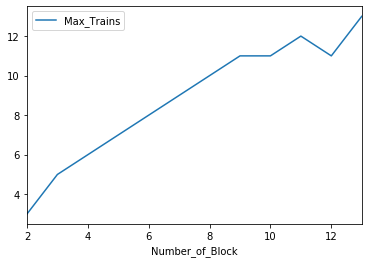

In [107]:
#Number of Blocks vs Number of Train
optim_df.plot.line(x='Number_of_Block', y='Max_Trains')

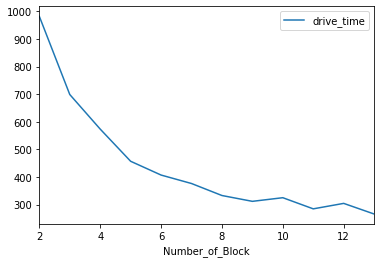

In [108]:
#Number of Blocks vs Drive time of trains
optim_df.plot.line(x='Number_of_Block', y='drive_time')

In [109]:
#performing regression function to equate the equation for Objective


from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(optim_df[['Number_of_Block','Max_Trains']], optim_df['drive_time'])
print(regressor.coef_)

[  48.08990929 -119.40705109]


In [110]:
print(regressor.intercept_)

1137.6721316179191


In [ ]:
#Objective Equation = ((48.09*Number_of_Blocks)-(119.41*Max_trains) +1037.67)

Performing Optimization using Monte Carlo

In [ ]:
Bounds of number of Blocks = 12 and 15
Bounds of number of trains = 1 and 12

In [111]:
import random

(2, 14, 9, 636.24)


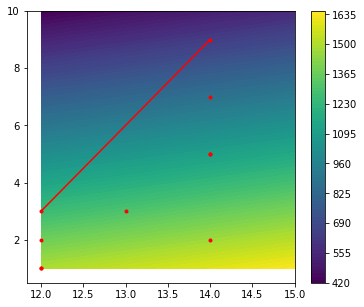

In [112]:
#initializing the random seed 
random.seed(0)

#Objective function
def f(x,y):
    return ((48.09*x)-(119.41*y) +1037.67)


#Function to perform Monte Carlo Optimization
def monte_carlo(n, xmin=12, xmax=15, ymin=1, ymax=12):
    x = [ random.randint(xmin, xmax) for i in range(n)]
    y = [ random.randint(ymin, ymax) for i in range(n)]
    xp = [ x[0] ]
    yp = [ y[0] ]
    fmin = f(xp[0], yp[0])
    for i in range(1, len(x)):
        fi = f(x[i], y[i])
        if fi < fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi
    xs = np.linspace(xmin, xmax, 100)
    ys = np.linspace(ymin, ymax, 100)
    xx, yy = np.meshgrid(xs, ys)
    z=f(xx, yy)
    fig, ax = plt.subplots(1, 1)
    fig.set_figwidth(6)
    fig.set_figheight(5)
    cs = ax.contourf(xs, ys, z, 100)
    fig.colorbar(cs, ax=ax)
    plt.scatter(x, y, c='red', marker='.')
    plt.plot(xp, yp, c='red')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])

from numpy import random
random.seed(100)
sol = monte_carlo(10)
print(sol)

Creating a schedule of the train running between London Old Oak to Birmingham Interchange station between the time period of 7.00 a.m. to 10.00 p.m.

In [118]:
#considering the optimal number of the block count
block_count = 14
block_len = 145000/block_count

#Steps to be done here

1. Creating the simulation dataframe with the optimum block value
2. Running the NetworkNode class
3. Running the Depot class
4. Running the Station class
5. Running the Track class
6. Running the allStation class
7. Running the allTracks class
8. Running the Network class
9. Running the Train class

Setting-up the limits for the simulation environment to run the schedule

In [138]:
df['start'] = parseTime("07:00:00")
df['stop']  = parseTime("22:00:00")
df['freq']  = np.round(df['Drive Time'].iloc[0] * n_free_blck+1,2)

df

,Line,Block,From,To,Distance,Drive Time,max a,max v,start,stop,freq
0,HS2,Block1,London Old Oak,Block1,11153.846154,249.39,0.7,25,25200,79200,250.39
1,HS2,Block2,Block1,Block2,11153.846154,271.79,0.7,25,25200,79200,250.39
2,HS2,Block3,Block2,Block3,11153.846154,270.21,0.7,25,25200,79200,250.39
3,HS2,Block4,Block3,Block4,11153.846154,252.38,0.7,25,25200,79200,250.39
4,HS2,Block5,Block4,Block5,11153.846154,253.80,0.7,25,25200,79200,250.39
5,HS2,Block6,Block5,Block6,11153.846154,301.69,0.7,25,25200,79200,250.39
6,HS2,Block7,Block6,Block7,11153.846154,259.91,0.7,25,25200,79200,250.39
7,HS2,Block8,Block7,Block8,11153.846154,259.23,0.7,25,25200,79200,250.39
8,HS2,Block9,Block8,Block9,11153.846154,249.32,0.7,25,25200,79200,250.39
9,HS2,Block10,Block9,Block10,11153.846154,336.58,0.7,25,25200,79200,250.39


In [140]:
tmp_list = list(['HS2' for i in range(block_count)])
df.set_index('Line',inplace=True)
df['Line'] = tmp_list
df

,Block,From,To,Distance,Drive Time,max a,max v,start,stop,freq,Line
Line,,,,,,,,,,,
HS2,Block1,London Old Oak,Block1,11153.846154,249.39,0.7,25,25200,79200,250.39,HS2
HS2,Block2,Block1,Block2,11153.846154,271.79,0.7,25,25200,79200,250.39,HS2
HS2,Block3,Block2,Block3,11153.846154,270.21,0.7,25,25200,79200,250.39,HS2
HS2,Block4,Block3,Block4,11153.846154,252.38,0.7,25,25200,79200,250.39,HS2
HS2,Block5,Block4,Block5,11153.846154,253.80,0.7,25,25200,79200,250.39,HS2
HS2,Block6,Block5,Block6,11153.846154,301.69,0.7,25,25200,79200,250.39,HS2
HS2,Block7,Block6,Block7,11153.846154,259.91,0.7,25,25200,79200,250.39,HS2
HS2,Block8,Block7,Block8,11153.846154,259.23,0.7,25,25200,79200,250.39,HS2
HS2,Block9,Block8,Block9,11153.846154,249.32,0.7,25,25200,79200,250.39,HS2


In [141]:
#Scheduling the train between 7am to 10pm
env = simpy.Environment()
network=Network()
network.trace(line='HS2')
network.registerIncident(start="09:00:00", stop="09:30:00", 
                         line='HS2', loc="Block1")
env.process(network.process())
env.run(until=parseTime("22:00:00"))
for t in network.tracks:
    if t.getLine()=='HS2':
        print(f"Max Trains that can travel between 7am to 10pm with an incident happended due to temporary breakdown {t.total_trains+1}")

07:00:05 HS2 [Train  0 ] dep  London Old Oak (DEPOT) for  London Old Oak
07:00:25 HS2 [Train  0 ] arr  London Old Oak
07:00:25  London Old Oak Signal Turns Red 
07:00:30 HS2 [Train  0 ] dep  London Old Oak for Block1
07:00:35  London Old Oak Signal Turns Green 
07:04:15 HS2 [Train  1 ] dep  London Old Oak (DEPOT) for  London Old Oak
07:04:35 HS2 [Train  1 ] arr  London Old Oak
07:04:35  London Old Oak Signal Turns Red 
07:04:39 HS2 [Train  0 ] arr Block1
07:04:39 Block1 Signal Turns Red 
07:04:44 HS2 [Train  0 ] dep Block1 for Block2
07:04:49 Block1 Signal Turns Green 
07:04:54 HS2 [Train  1 ] dep  London Old Oak for Block1
07:04:59  London Old Oak Signal Turns Green 
07:08:25 HS2 [Train  2 ] dep  London Old Oak (DEPOT) for  London Old Oak
07:08:45 HS2 [Train  2 ] arr  London Old Oak
07:08:45  London Old Oak Signal Turns Red 
07:09:03 HS2 [Train  1 ] arr Block1
07:09:03 Block1 Signal Turns Red 
07:09:16 HS2 [Train  0 ] arr Block2
07:09:16 Block2 Signal Turns Red 
07:09:21 HS2 [Train  0